In [182]:
# Importing packages, I also use glob and os (learned from some websites) for sake of data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import glob
import os

In [183]:
# Data directly downloaded from the database. I put them in one fold. These several lines helps me to
# read all data, extract columns I need, and merge all datasets. They look simple and compact, but 
# I put quite  some time to learn this from some websites and get this work.

path = 'data'
all_files = glob.glob(os.path.join(path , "*.csv"))
df_from_each_file = (pd.read_csv(f, usecols = [1]) for f in all_files)
df   = pd.concat(df_from_each_file, axis=1)
df.columns = ['y_t', 'p_t', 'i_t', 'ep_t', 'gi_t', 'u_t']
print(df)

         y_t        p_t       i_t       ep_t      gi_t       u_t
0   160448.5   2.566667  0.131200    4.12371  1.782667  6.833333
1   159325.8   3.300000  0.080867    5.51562  1.659667  7.200000
2   159840.3   3.200000  0.067900    4.96014  1.744667  7.700000
3   159551.4   3.033333  0.081967    4.00438  1.784667  8.133333
4   160513.6   2.766667  0.085133    1.69169  2.183333  8.500000
5   161532.4   1.300000  0.121667   -0.08072  2.129667  8.466667
6   161379.3   0.433333  0.181567   -1.23308  1.933000  8.666667
7   162324.1   0.333333  0.192567   -1.25148  1.717667  8.466667
8   162729.9   0.333333  0.022600   -1.30569  1.253667  8.100000
9   164187.4   0.200000 -0.015400   -0.91447  0.914333  8.133333
10  165165.0  -0.500000 -0.045667   -2.29101  0.420667  8.166667
11  165673.9   0.400000 -0.099600   -2.02386  0.707333  8.000000
12  166244.3   0.500000 -0.124900   -2.74393  0.901667  7.733333
13  166271.5   0.433333 -0.157533   -3.60684  0.731667  7.733333
14  167799.4   0.333333 -

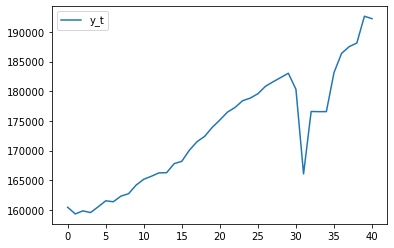

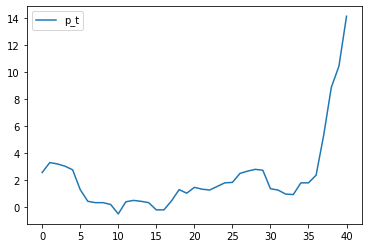

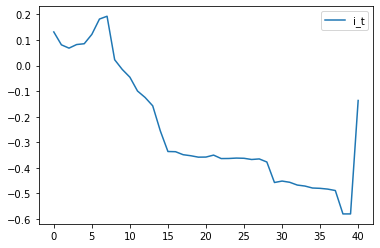

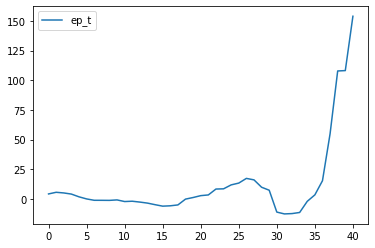

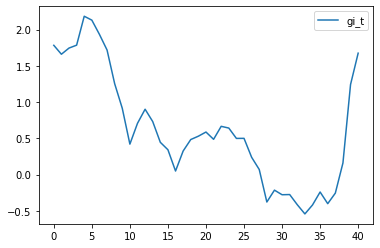

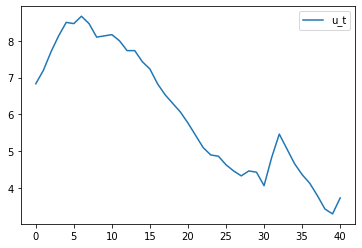

In [184]:
df.plot(y = 'y_t')
df.plot(y = 'p_t')
df.plot(y = 'i_t')
df.plot(y = 'ep_t')
df.plot(y = 'gi_t')
df.plot(y = 'u_t')
plt.show()

In [185]:
# First-differencing time series data as required in time series analysis. I create a function to do so
# (also learned from a website)

def FirstDiff(x):
    x_diff = x - x.shift(1)
    x_diff = x_diff.dropna()
    return x_diff

df = pd.DataFrame({'Diffy_t':FirstDiff(df.y_t),
                  'Diffp_t':FirstDiff(df.p_t),
                  'Diffi_t':FirstDiff(df.i_t),
                  'Diffep_t':FirstDiff(df.ep_t),
                  'Diffgi_t':FirstDiff(df.gi_t),
                  'Diffu_t':FirstDiff(df.u_t)})

print(df)

    Diffy_t   Diffp_t   Diffi_t  Diffep_t  Diffgi_t   Diffu_t
1   -1122.7  0.733333 -0.050333   1.39191 -0.123000  0.366667
2     514.5 -0.100000 -0.012967  -0.55548  0.085000  0.500000
3    -288.9 -0.166667  0.014067  -0.95576  0.040000  0.433333
4     962.2 -0.266667  0.003167  -2.31269  0.398667  0.366667
5    1018.8 -1.466667  0.036533  -1.77241 -0.053667 -0.033333
6    -153.1 -0.866667  0.059900  -1.15236 -0.196667  0.200000
7     944.8 -0.100000  0.011000  -0.01840 -0.215333 -0.200000
8     405.8  0.000000 -0.169967  -0.05421 -0.464000 -0.366667
9    1457.5 -0.133333 -0.038000   0.39122 -0.339333  0.033333
10    977.6 -0.700000 -0.030267  -1.37654 -0.493667  0.033333
11    508.9  0.900000 -0.053933   0.26715  0.286667 -0.166667
12    570.4  0.100000 -0.025300  -0.72007  0.194333 -0.266667
13     27.2 -0.066667 -0.032633  -0.86291 -0.170000  0.000000
14   1527.9 -0.100000 -0.098067  -1.33290 -0.286000 -0.300000
15    395.1 -0.533333 -0.080500  -1.24076 -0.102667 -0.200000
16   187

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Jan, 2023
Time:                     22:43:28
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    9.56727
Nobs:                     39.0000    HQIC:                   8.41853
Log likelihood:          -441.659    FPE:                    2438.97
AIC:                      7.77574    Det(Omega_mle):         905.829
--------------------------------------------------------------------
Results for equation Diffy_t
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             876.260767       543.545167            1.612           0.107
L1.Diffy_t         -0.220920         0.153414           -1.440           0.150
L1.Diffp_t        217.974345      1175.029835            0.186    

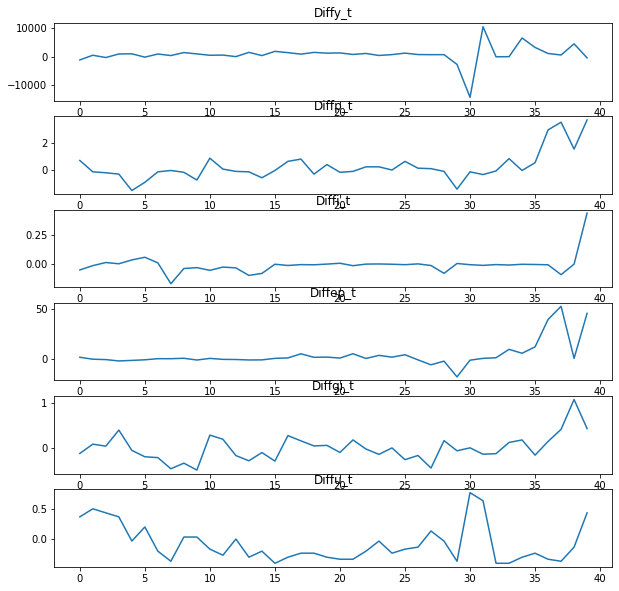

In [186]:
# Use a command from statsmodels.tsa.api, designed for VAR estimation, to estimate a VAR model

model = smt.VAR(df)
res = model.fit(maxlags=1)
print(res.summary())

res.plot();

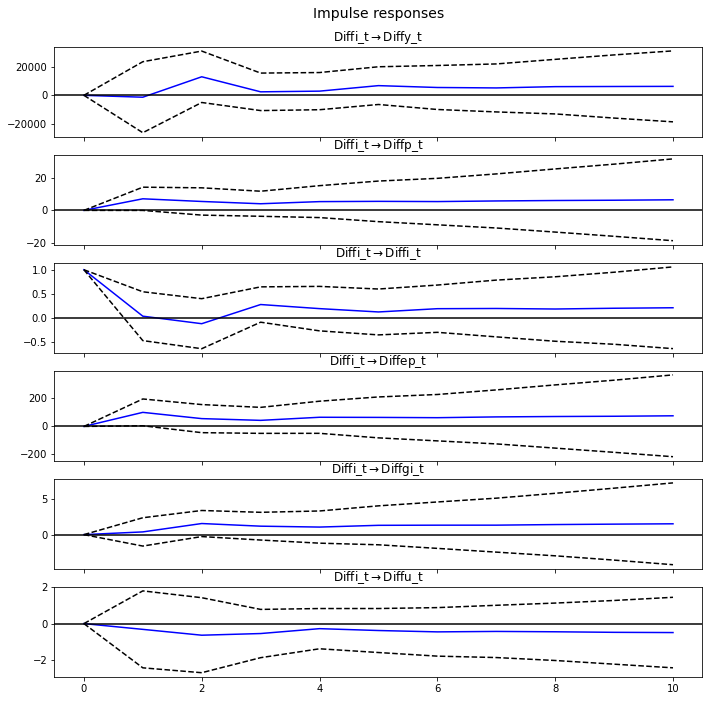

In [187]:
# Use functions from the same package to estimate impulse responses, and plot. I shock the short-term 
# interest rate, and see how other variables response

irf = res.irf(10)
irf.plot(impulse = 'Diffi_t', orth=False);

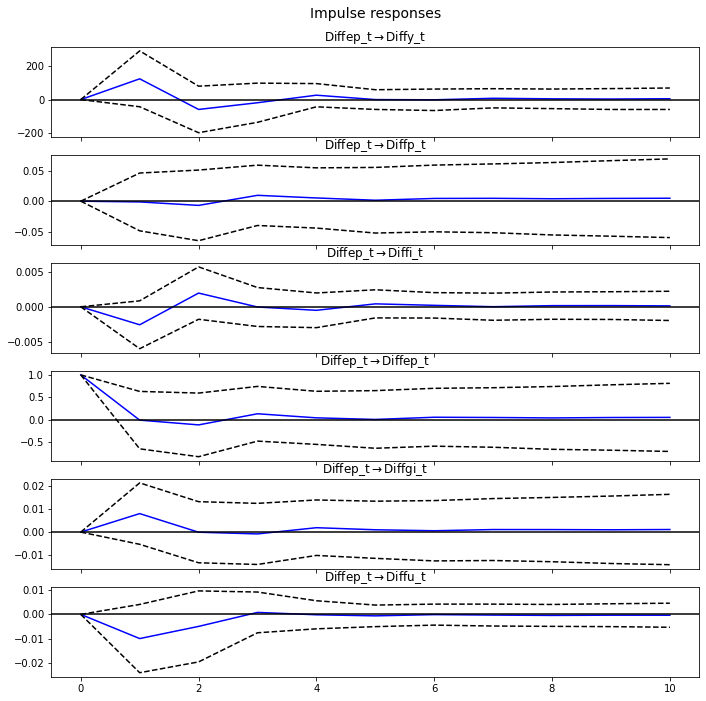

In [188]:
# I can also shock the energy inflation, see how other variables response

irf = res.irf(10)
irf.plot(impulse = 'Diffep_t',  orth=False);

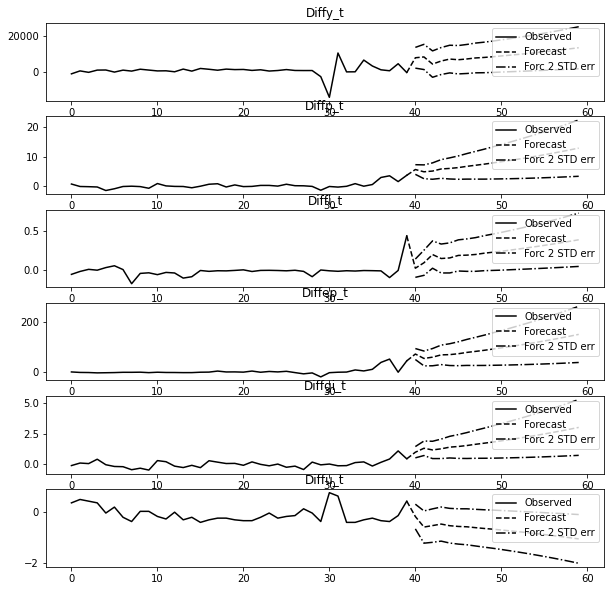

In [189]:
# Use a function from the same package to forecast next 20 periods

res.plot_forecast(20);

In [190]:
# However, there is a problem with VAR forecasting by the package because as I first-difference the data
# the forecast values should be cumulated, but I couldn't find a function in the package to do so.
# Therefore, I try to obtain the estimates and covariance matrix by hand

# Create X and Y to calculate estimates by hand
dflag_1= df.shift(1)
dflag_1 = dflag_1.dropna()
df1 = df.iloc[1:]

dflag_1.insert(0, "Intercept", 1)
X = dflag_1.to_numpy()
Y = df1.to_numpy()

# This function will obtain OLS estimates
def OLSoperation(X, y):

    XtX = np.matmul(X.T, X)
    XtY = np.matmul(X.T, y)
    XtX_Inv = np.linalg.inv(XtX)
    
    b = np.matmul(XtX_Inv, XtY)
    
    return b

B = OLSoperation(X, Y)
np.set_printoptions(suppress=True,precision=5)
print(B)

# Predicted values
y_estimates = []

for i in df.index:
    entry = df.loc[i].to_numpy()
    
    y_hat = np.dot(B, entry)
    y_estimates.append(y_hat)

# Forecast values

# However, I can't continue because I don't know how to calculate covariance matrix by hand, so
# I can't obtain cholesky matrix

Steps = 20
forecast_values = []
data = df.iloc[-1].to_list()

# for i in range(Steps):
    
#data, B)
#    data.insert(1, PredictY)
#    forecast_values.append(PredictY); PredictY = np.dot(

[[  876.26077     0.1683      0.00167     3.33183    -0.02587    -0.01304]
 [   -0.22092     0.00004     0.          0.00057    -0.         -0.00004]
 [  217.97435     0.73146     0.00826     7.11976     0.09576     0.04487]
 [-1337.15151     7.08385     0.0329    100.27608     0.38706    -0.31503]
 [  124.97472    -0.00123    -0.00255    -0.00418     0.00811    -0.00994]
 [ -694.9461      0.0231      0.21488     3.99604     0.20886     0.27174]
 [ 2886.25884    -0.66099     0.0175     -5.08158     0.02829     0.32056]]
